## Bibliotecas e Base de Dados

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('heart.csv')

In [2]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Limpeza da Base de Dados

In [3]:
X = data.drop('target', axis = 1)
y = data['target']

## Métodos de Classificação

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Logistic Regression

In [5]:
from sklearn.linear_model import LogisticRegression

solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

lr_X_train = X_train
lr_X_test = X_test
lr_y_train = y_train
lr_y_test = y_test

for solver in solvers:
    lr = LogisticRegression(solver= solver, multi_class= 'ovr')
    lr.fit(lr_X_train, lr_y_train)
    lr_pred = lr.predict(lr_X_test)
    print ('Solver: ' + solver)
    print('Accuracy Score: {0:.3f}\n'.format(lr.score(lr_X_test, lr_y_test)))

Solver: newton-cg
Accuracy Score: 0.769

Solver: lbfgs
Accuracy Score: 0.791

Solver: liblinear
Accuracy Score: 0.780

Solver: sag
Accuracy Score: 0.725

Solver: saga
Accuracy Score: 0.714



/home/lucas/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/lucas/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/lucas/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [6]:
lr = LogisticRegression(solver= 'newton-cg', multi_class= 'ovr')
lr.fit(lr_X_train, lr_y_train)
lr_pred = lr.predict(lr_X_test)

print(classification_report(lr_y_test,lr_pred))

              precision    recall  f1-score   support

           0       0.75      0.77      0.76        43
           1       0.79      0.77      0.78        48

    accuracy                           0.77        91
   macro avg       0.77      0.77      0.77        91
weighted avg       0.77      0.77      0.77        91



### Naive Bayes Classifier

In [7]:
from sklearn.naive_bayes import GaussianNB

nbc_X_train = X_train
nbc_X_test = X_test
nbc_y_train = y_train
nbc_y_test = y_test

nbc = GaussianNB()
nbc.fit(nbc_X_train, nbc_y_train)
nbc_pred = nbc.predict(nbc_X_test)
print('Accuracy Score: {0:.3f}\n'.format(nbc.score(nbc_X_test, nbc_y_test)))

Accuracy Score: 0.813



In [8]:
print(classification_report(nbc_y_test,nbc_pred))

              precision    recall  f1-score   support

           0       0.80      0.81      0.80        43
           1       0.83      0.81      0.82        48

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



### K-Nearest Neighbors (KNN)

In [11]:
scaler = StandardScaler()
scaler.fit(X_train)
knn_X_train = scaler.transform(X_train)
knn_X_test = scaler.transform(X_test)

In [12]:
from sklearn.neighbors import KNeighborsClassifier

knn_error_rate = []
knn_score = []

knn_y_train = y_train
knn_y_test = y_test

for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(knn_X_train, knn_y_train)
    knn_pred = knn.predict(knn_X_test)
    knn_error_rate.append(np.mean(knn_pred != knn_y_test))
    knn_score.append(knn.score(knn_X_test, knn_y_test))

Text(0, 0.5, 'Error Rate')

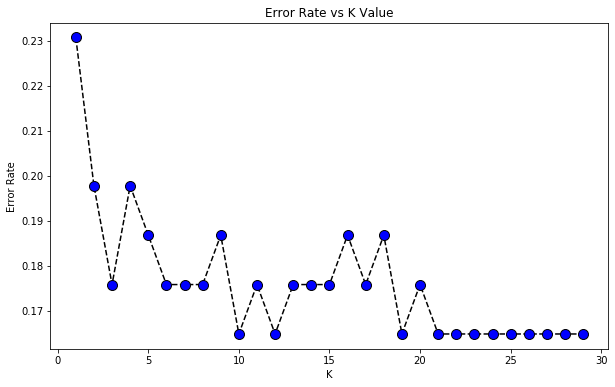

In [13]:
plt.figure(figsize = (10, 6))
plt.plot(range(1, 30), knn_error_rate, color = 'black', linestyle = 'dashed', 
         marker = 'o', markerfacecolor = 'blue', markersize = 10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Text(0, 0.5, 'Accuracy Score')

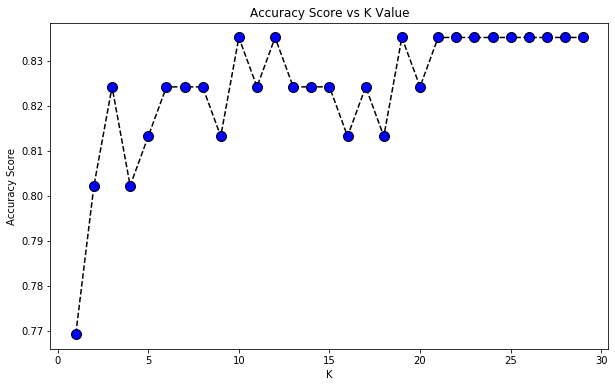

In [14]:
plt.figure(figsize = (10, 6))
plt.plot(range(1, 30), knn_score, color = 'black', linestyle = 'dashed', 
         marker = 'o', markerfacecolor = 'blue', markersize = 10)
plt.title('Accuracy Score vs K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Score')

In [20]:
for i in range(8,23):
    print('K: ' + str(i + 1))
    print('Accuracy Score: {0:.3f}'.format(knn_score[i]))
    print('Error Rate: {0:.3f}\n'.format(knn_error_rate[i]))

K: 9
Accuracy Score: 0.813
Error Rate: 0.187

K: 10
Accuracy Score: 0.835
Error Rate: 0.165

K: 11
Accuracy Score: 0.824
Error Rate: 0.176

K: 12
Accuracy Score: 0.835
Error Rate: 0.165

K: 13
Accuracy Score: 0.824
Error Rate: 0.176

K: 14
Accuracy Score: 0.824
Error Rate: 0.176

K: 15
Accuracy Score: 0.824
Error Rate: 0.176

K: 16
Accuracy Score: 0.813
Error Rate: 0.187

K: 17
Accuracy Score: 0.824
Error Rate: 0.176

K: 18
Accuracy Score: 0.813
Error Rate: 0.187

K: 19
Accuracy Score: 0.835
Error Rate: 0.165

K: 20
Accuracy Score: 0.824
Error Rate: 0.176

K: 21
Accuracy Score: 0.835
Error Rate: 0.165

K: 22
Accuracy Score: 0.835
Error Rate: 0.165

K: 23
Accuracy Score: 0.835
Error Rate: 0.165



In [21]:
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(knn_X_train, knn_y_train)
knn_pred = knn.predict(knn_X_test)

print(classification_report(knn_y_test,knn_pred))

              precision    recall  f1-score   support

           0       0.85      0.79      0.82        43
           1       0.82      0.88      0.85        48

    accuracy                           0.84        91
   macro avg       0.84      0.83      0.83        91
weighted avg       0.84      0.84      0.83        91



### Support Vector Machines (SVM)